# Testing the sample module
## Import modules

In [1]:
import sys
import numpy as np
sys.path.insert(0,'../..')
from pybandstructure.sample import *
import matplotlib.pyplot as plt
from os import remove
from pybandstructure.common import *

# Test sample class

In [2]:
random_sample = Sample.sample(basis_vectors = [[1,0],[0,1]], 
                              denominator = (3,2), 
                              integer_coords = [[0,0],[1,0],[0,1],[1,1]],
                              special_points = {r'$\Gamma$' : (0,0)})

## List of the available methods and properties

In [3]:
[x for x in dir(random_sample) if x[0] != '_' ]

['basis_vectors',
 'contour',
 'coords',
 'denominator',
 'from_file',
 'get_coords',
 'get_fractional_part',
 'get_integer_coords',
 'get_integer_part',
 'integer_coords',
 'lattice_dimension',
 'lattice_sample',
 'line_sample',
 'plot',
 'sample',
 'save',
 'space_dimension',
 'special_points']

## Print properties

In [4]:
print('basis_vectors = \n', random_sample.basis_vectors)
print('denominator = ', random_sample.denominator)
print('lattice_dimension, space_dimension = ',random_sample.lattice_dimension, random_sample.space_dimension)
print('special_points = ', random_sample.special_points)
print('integer_coords = \n', random_sample.integer_coords)
print('coords = \n',random_sample.coords)
print(random_sample._points_db)
print(random_sample.special_points)

basis_vectors = 
 [[1. 0.]
 [0. 1.]]
denominator =  [3 2]
lattice_dimension, space_dimension =  2 2
special_points =  {'$\\Gamma$': (0, 0)}
integer_coords = 
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
coords = 
 [[0.         0.        ]
 [0.33333333 0.        ]
 [0.         0.5       ]
 [0.33333333 0.5       ]]
{(0, 0): {'index': 0}, (1, 0): {'index': 1}, (0, 1): {'index': 2}, (1, 1): {'index': 3}}
{'$\\Gamma$': (0, 0)}


## Test __call__ and __get_item__

In [5]:
print(random_sample(0))
print(random_sample((0,0)))
print(random_sample(r'$\Gamma$'))

{'index': 0}
{'index': 0}
{'index': 0}


In [6]:
print(random_sample[0])
print(random_sample[(0,0)])
print(random_sample[r'$\Gamma$'])

0
0
0


## Test __contains__, __len__

In [7]:
print('length = ', len(random_sample))
print((0,0) in random_sample)
print(0 in random_sample)
print('$\Gamma$' in random_sample)

length =  4
True
True
True


## Test __iter__

In [8]:
for v in random_sample:
    print(v)

(0, 0)
(1, 0)
(0, 1)
(1, 1)


## Test get_coords, get_integer_coords

In [9]:
print(random_sample.get_coords(0))
print(random_sample.get_coords((0,0)))
print(random_sample.get_coords(r'$\Gamma$'))
print(random_sample.get_integer_coords(0))
print(random_sample.get_integer_coords((0,0)))
print(random_sample.get_integer_coords(r'$\Gamma$'))

[0. 0.]
[0. 0.]
[0. 0.]
[0 0]
[0 0]
[0 0]


## Test integer and fractional parts

In [10]:
for i in range(len(random_sample)):
    print( random_sample.get_integer_coords(i))
    print( random_sample.get_integer_part(i) )
    print( random_sample.get_fractional_part(i) )

[0 0]
(0, 0)
(0, 0)
[1 0]
(0, 0)
(1, 0)
[0 1]
(0, 0)
(0, 1)
[1 1]
(0, 0)
(1, 1)


## Test contour

In [11]:
print(random_sample.contour(['$\Gamma$', 1, (1,1), 0 ]))

{'indices': array([0, 1, 3, 0]), 'x': array([0.        , 0.33333333, 0.83333333, 1.43425855]), 'vertices': array([0, 1, 2, 3], dtype=int32)}


## Test plot()

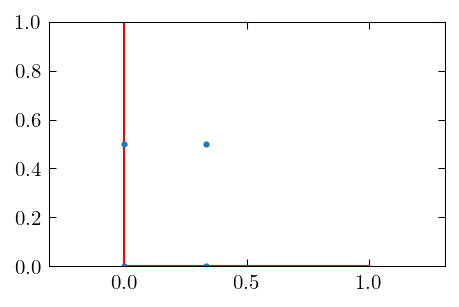

In [12]:
_ = random_sample.plot()

## Test save()

In [13]:
try:
    remove('../test_output/sample.hdf5')
except:
    pass
random_sample.save(file_name = '../test_output/sample.hdf5', 
                   sample_name = 'random_sample')

In [14]:
import h5py
file_name='../test_output/sample.hdf5'
with h5py.File(file_name, "r") as file_to_read:
    print(type(file_to_read['random_sample'].attrs['class_name'] ))

<class 'str'>


## Test loading from file

In [15]:
random_sample = Sample.from_file(file_name='../test_output/sample.hdf5', sample_name='random_sample')

Sample


## Test lattice_sample constructor

### Hexagonal lattice

In [16]:
cut_off = 8
hexagonal = Sample.lattice_sample([[1,0.5],[0,np.sqrt(3)*0.5]],cut_off)
[x for x in dir(hexagonal) if x[0] != '_' ]
hexagonal.save(file_name='../test_output/sample.hdf5', sample_name='hexagonal')
hexagonal = Sample.from_file(file_name='../test_output/sample.hdf5', sample_name='hexagonal')

Sample


70


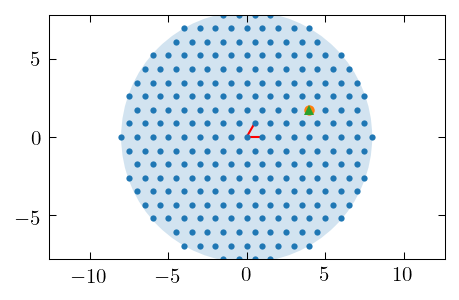

In [17]:
hexagonal.plot()
circle = plt.Circle((0,0), cut_off, alpha = 0.2)
plt.plot(*hexagonal.get_coords((3,2)),'o',ms=5)
plt.plot(*hexagonal.get_coords(hexagonal[(3,2)]),'^',ms=5)
ax = plt.gca()
ax.add_artist(circle)
print(hexagonal[hexagonal[(3,2)]])

### Square lattice

In [18]:
square = Sample.lattice_sample([[1,0],[0,1]],cut_off)

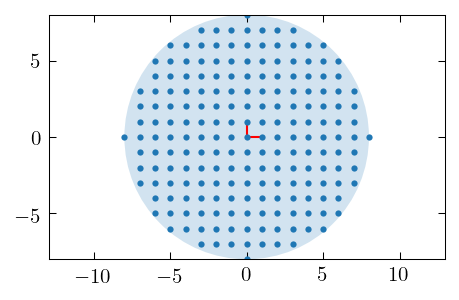

In [19]:
square.plot()
circle = plt.Circle((0,0), cut_off, alpha = 0.2)
ax = plt.gca()
ax.add_artist(circle)

### Rectangular lattice

In [20]:
rectangular = Sample.lattice_sample([[1,0],[0,1.618]],cut_off, special_points = {'Origin' : (0,0)})
contour = rectangular.contour(['Origin', (3,0),(3,3),0])

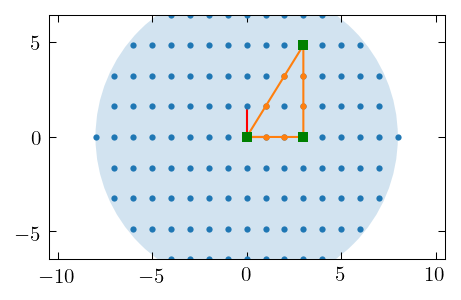

In [21]:
rectangular.plot()
circle = plt.Circle((0,0), cut_off, alpha = 0.2)
ax = plt.gca()
ax.add_artist(circle)
plt.plot(rectangular.coords[contour['indices'],0], rectangular.coords[contour['indices'],1],'o-')
plt.plot(rectangular.coords[contour['indices'][contour['vertices']],0], 
         rectangular.coords[contour['indices'][contour['vertices']],1],
         'gs',ms=5)

### Oblique lattice

In [22]:
oblique = Sample.lattice_sample([[3,2],[0,0.8]],cut_off )

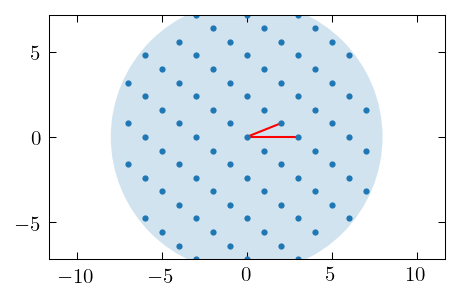

In [23]:
oblique.plot()
circle = plt.Circle((0,0), cut_off, alpha = 0.2)
ax = plt.gca()
ax.add_artist(circle)

## Test Line_sample constructor

In [24]:
line = Sample.line_sample(basis_vectors = [[1,0],
                                           [0,1]],
                          cut_off = 5, direction = 0, special_points = {'Origin' : (0,0)})
line2 = Sample.line_sample(basis_vectors = [[1,0],
                                           [0,1]],
                          cut_off = 5, direction = 1)

../..\pybandstructure\sample\sample.py:584: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


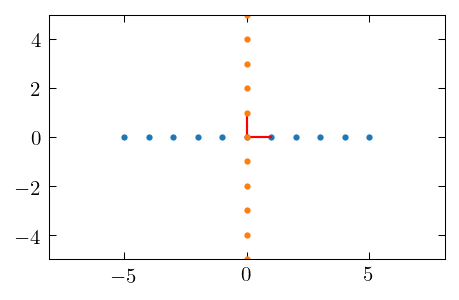

In [25]:
line.plot()
line2.plot()

# Test Space_Sample subclass

In [26]:
denominator = (5,5)
arrs = np.meshgrid(*[np.arange(-(den//2) , den//2 + 1) for den in denominator])
integer_coords = np.stack([arr.flatten() for arr in arrs], axis = -1)
space_sample = Space_Sample(basis_vectors = [[1,0],
                                             [0,1]],
                            denominator = denominator, 
                            integer_coords = integer_coords, 
                            volume = 1.,
                            special_points = {r'$K$' : (0,0)})

## Print properties

In [27]:
print('basis_vectors = \n', space_sample.basis_vectors)
print('denominator = ', space_sample.denominator)
print('lattice_dimension, space_dimension = ',space_sample.lattice_dimension, space_sample.space_dimension)
print('volme = ', space_sample.volume)
print('special_points = ', space_sample.special_points)
print('integer_coords = \n', space_sample.integer_coords)
print('coords = \n',space_sample.coords)
print('weights = \n',space_sample.weights)
print(space_sample._points_db)
print(space_sample.special_points)

basis_vectors = 
 [[1. 0.]
 [0. 1.]]
denominator =  [5 5]
lattice_dimension, space_dimension =  2 2
volme =  1.0
special_points =  {'$K$': (0, 0)}
integer_coords = 
 [[-2 -2]
 [-1 -2]
 [ 0 -2]
 [ 1 -2]
 [ 2 -2]
 [-2 -1]
 [-1 -1]
 [ 0 -1]
 [ 1 -1]
 [ 2 -1]
 [-2  0]
 [-1  0]
 [ 0  0]
 [ 1  0]
 [ 2  0]
 [-2  1]
 [-1  1]
 [ 0  1]
 [ 1  1]
 [ 2  1]
 [-2  2]
 [-1  2]
 [ 0  2]
 [ 1  2]
 [ 2  2]]
coords = 
 [[-0.4 -0.4]
 [-0.2 -0.4]
 [ 0.  -0.4]
 [ 0.2 -0.4]
 [ 0.4 -0.4]
 [-0.4 -0.2]
 [-0.2 -0.2]
 [ 0.  -0.2]
 [ 0.2 -0.2]
 [ 0.4 -0.2]
 [-0.4  0. ]
 [-0.2  0. ]
 [ 0.   0. ]
 [ 0.2  0. ]
 [ 0.4  0. ]
 [-0.4  0.2]
 [-0.2  0.2]
 [ 0.   0.2]
 [ 0.2  0.2]
 [ 0.4  0.2]
 [-0.4  0.4]
 [-0.2  0.4]
 [ 0.   0.4]
 [ 0.2  0.4]
 [ 0.4  0.4]]
weights = 
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
{(-2, -2): {'index': 0}, (-1, -2): {'index': 1}, (0, -2): {'index': 2}, (1, -2): {'index': 3}, (2, -2): {'index': 4}, (-2, -1): {'i

## Test __call__ and __get_item__

In [28]:
print(space_sample(0))
print(space_sample((0,0)))
print(space_sample(r'$K$'))

{'index': 0}
{'index': 12}
{'index': 12}


In [29]:
print(space_sample[0])
print(space_sample[(0,0)])
print(space_sample(r'$K$'))

0
12
{'index': 12}


## Test __contains__, __len__

In [30]:
print('length = ', len(space_sample))
print((0,0) in space_sample)
print(0 in space_sample)
print('$K$' in space_sample)
print('$\Gamma$' in space_sample)

length =  25
True
True
True
False


## Test get_coords, get_integer_coords

In [31]:
print(space_sample.get_coords(0))
print(space_sample.get_coords((0,0)))
print(space_sample.get_coords('$K$'))
print(space_sample.get_integer_coords(0))
print(space_sample.get_integer_coords((0,0)))
print(space_sample.get_integer_coords('$K$'))
print(space_sample.get_weight(0))
print(space_sample.get_weight((0,0)))
print(space_sample.get_weight(r'$K$'))

[-0.4 -0.4]
[0. 0.]
[0. 0.]
[-2 -2]
[0 0]
[0 0]
0.04
0.04
0.04


## Test integer and fractional parts

In [32]:
for i in range(len(space_sample)):
    print( space_sample.get_integer_coords(i))
    print( space_sample.get_integer_part(i) )
    print( space_sample.get_fractional_part(i) )

[-2 -2]
(-1, -1)
(3, 3)
[-1 -2]
(-1, -1)
(4, 3)
[ 0 -2]
(0, -1)
(0, 3)
[ 1 -2]
(0, -1)
(1, 3)
[ 2 -2]
(0, -1)
(2, 3)
[-2 -1]
(-1, -1)
(3, 4)
[-1 -1]
(-1, -1)
(4, 4)
[ 0 -1]
(0, -1)
(0, 4)
[ 1 -1]
(0, -1)
(1, 4)
[ 2 -1]
(0, -1)
(2, 4)
[-2  0]
(-1, 0)
(3, 0)
[-1  0]
(-1, 0)
(4, 0)
[0 0]
(0, 0)
(0, 0)
[1 0]
(0, 0)
(1, 0)
[2 0]
(0, 0)
(2, 0)
[-2  1]
(-1, 0)
(3, 1)
[-1  1]
(-1, 0)
(4, 1)
[0 1]
(0, 0)
(0, 1)
[1 1]
(0, 0)
(1, 1)
[2 1]
(0, 0)
(2, 1)
[-2  2]
(-1, 0)
(3, 2)
[-1  2]
(-1, 0)
(4, 2)
[0 2]
(0, 0)
(0, 2)
[1 2]
(0, 0)
(1, 2)
[2 2]
(0, 0)
(2, 2)


## Test contour

In [33]:
print(space_sample.contour([0, 1, (1,1), 0 ]))

{'indices': array([ 0,  1, 18, 12,  6,  0]), 'x': array([0.        , 0.2       , 0.92111026, 1.20395297, 1.48679568,
       1.76963839]), 'vertices': array([0, 1, 2, 5], dtype=int32)}


## Test plot()

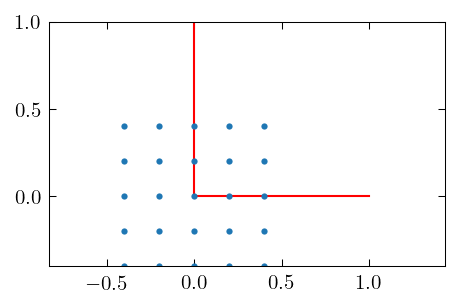

In [34]:
_ = space_sample.plot()

## Test save()

In [35]:
space_sample.save(file_name = '../test_output/sample.hdf5', 
                   sample_name = 'space_sample')

## Test loading from file

In [36]:
space_sample = Space_Sample.from_file(file_name = '../test_output/sample.hdf5', sample_name = 'space_sample')

Space_Sample


## Test centered_cubic_sample constructor

In [37]:
cubic_sample = Space_Sample.cubic_sample(basis_vectors = [[1,0],
                                                                    [0,1]],
                                                   denominator = 5)

In [38]:
cut_off =1
spherical_sample = Space_Sample.spherical_sample(basis_vectors = [[1,0.5],
                                                              [0,np.sqrt(3)*0.5]],
                                             cut_off =cut_off,
                                                   denominator = (15,15))

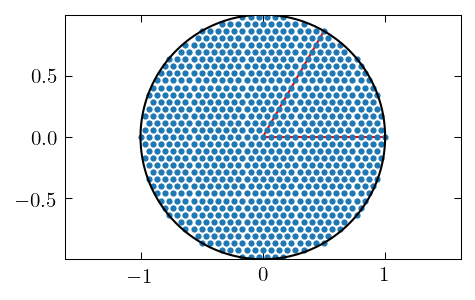

In [39]:
theta = np.linspace(0,2*np.pi,num=200)

spherical_sample.plot()
plt.plot(cut_off*np.cos(theta), cut_off*np.sin(theta),'k-')

In [40]:
spherical_sample.volume

3.1677284769537466

In [41]:
threeD_sample = Space_Sample.spherical_sample(basis_vectors = [[1,0,0],
                                                               [0,1,0],
                                                               [0,0,1]],
                                              denominator = 3, cut_off=1)

In [42]:
threeD_sample.volume

4.555555555555555

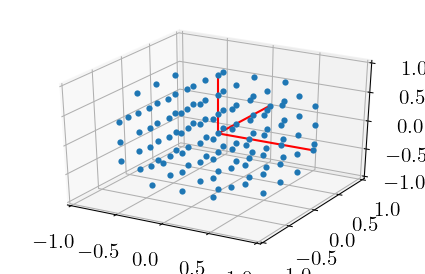

In [43]:
threeD_sample.plot()

../..\pybandstructure\sample\sample.py:720: UserWarning: Lattice dimension different from space dimension
  warn("Lattice dimension different from space dimension")


array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

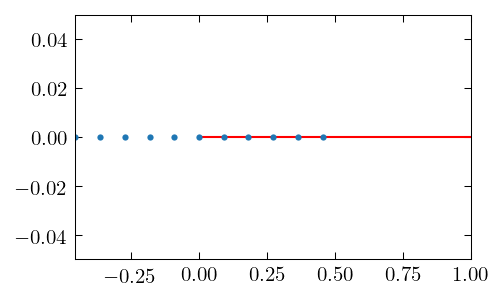

In [44]:
sample_1d = Space_Sample.cubic_sample(basis_vectors = [[1],
                                                                [0]],
                                                   denominator = 11)
sample_1d.plot()
sample_1d.weights

# Test Unit_Cell_Sample subclass

In [45]:
default_cell = Unit_Cell_Sample.default_unit_cell(basis_vectors=[[1,0.5],[0,np.sqrt(3)*0.5]], 
                                                  denominator = (12,12),
                                                  special_points = {'$\Gamma$' : (0,0)})

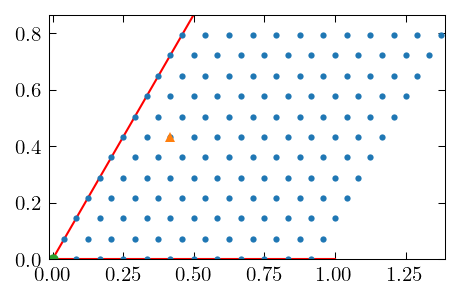

In [46]:
default_cell.plot()
plt.plot(*default_cell.get_coords((470,282)),'^',ms=5)
plt.plot(* default_cell.get_coords(default_cell.special_points['$\Gamma$']),'o', ms=5)

### Irreducible D6 sampling

In [47]:
D6 = Unit_Cell_Sample.irreducible_sample(name = '2D_Hexagonal_D6', 
                                         basis_vectors=[[1,-0.5],[0,np.sqrt(3)*0.5]], 
                                                denominator = 12)
D6.save(file_name='../test_output/sample.hdf5', sample_name='D6')
D6 = Unit_Cell_Sample.from_file(file_name='../test_output/sample.hdf5', sample_name='D6')

Unit_Cell_Sample


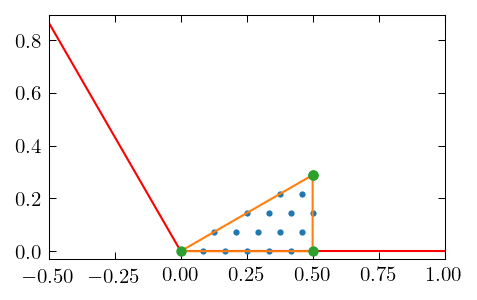

In [48]:
contour = D6.contour(['$K$','$\Gamma$', '$M$', '$K$'])
D6.plot()
#plt.plot(* D6.get_coords(D6.special_points['\Gamma']),'o', ms=5)
#plt.plot(* D6.get_coords(D6.special_points['K']),'^', ms=5)
#plt.plot(* D6.get_coords(D6.special_points['M']),'s', ms=5)
plt.plot(D6.coords[contour['indices'],0], D6.coords[contour['indices'],1])
plt.plot(D6.coords[contour['indices'][contour['vertices']],0], D6.coords[contour['indices'][contour['vertices']],1],'o', ms=5)

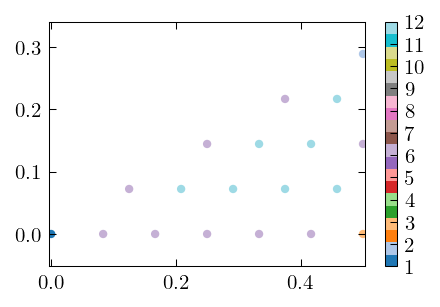

In [49]:
plt.scatter(D6.coords[:,0],D6.coords[:,1],c= np.prod(D6.denominator)*D6.weights[:],cmap = 'tab20')
plt.axis('equal')
plt.colorbar(ticks = np.arange(1,13))

### Irreducible D3 sampling

In [50]:
D3 = Unit_Cell_Sample.irreducible_sample(name = '2D_Hexagonal_D3_Axes',
                                         basis_vectors=[[1,-0.5],[0,np.sqrt(3)*0.5]], 
                                                denominator = 12)

In [51]:
D3.special_points

{'$\\Gamma$': (0, 0), '$M$': (6, 0), '$M^\\prime$': (6, 6), '$K$': (8, 4)}

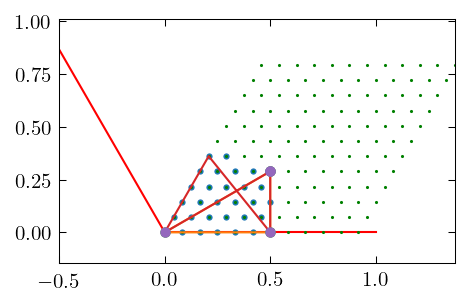

In [52]:
contour = D3.contour(['$K$','$\Gamma$', '$M$', '$K$'])
contour2 = D3.contour(['$K$','$\Gamma$', '$M^\prime$', '$K$'])
D3.plot()
plt.plot(default_cell.coords[:,0],default_cell.coords[:,1],'g.')

plt.plot(D3.coords[contour['indices'],0], D3.coords[contour['indices'],1])
plt.plot(D3.coords[contour['indices'][contour['vertices']],0], D3.coords[contour['indices'][contour['vertices']],1],'o', ms=5)

plt.plot(D3.coords[contour2['indices'],0], D3.coords[contour2['indices'],1])
plt.plot(D3.coords[contour2['indices'][contour2['vertices']],0], D3.coords[contour2['indices'][contour2['vertices']],1],'o', ms=5)

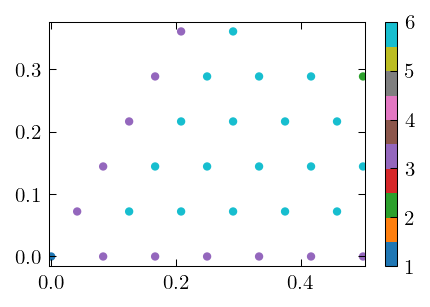

In [53]:
plt.scatter(D3.coords[:,0],D3.coords[:,1],c=  np.prod(D3.denominator)*D3.weights[:],cmap = 'tab10')
plt.axis('equal')
plt.colorbar()

### Irreducible D4 sampling

In [54]:
D4 =Unit_Cell_Sample.irreducible_sample(name = '2D_Square_D4',
                                        basis_vectors = [[1,0],
                                                         [0,1]], 
                                        denominator = 12)

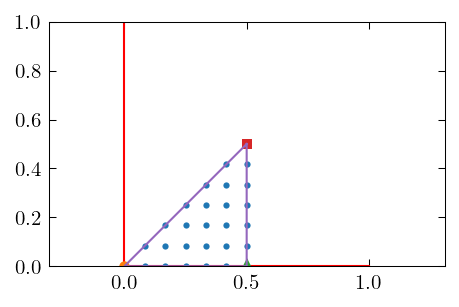

In [55]:
contour = D4.contour(['$M$', '$\Gamma$', '$X$', '$M$'])
D4.plot()
plt.plot(* D4.get_coords(D4.special_points['$\Gamma$']),'o', ms=5)
plt.plot(* D4.get_coords(D4.special_points['$X$']),'^', ms=8)
plt.plot(* D4.get_coords(D4.special_points['$M$']),'s', ms=5)
plt.plot(D4.coords[contour['indices'],0],D4.coords[contour['indices'],1])

In [56]:
D4.integrate(np.ones_like(D4.coords), axis = 0)

array([1., 1.])

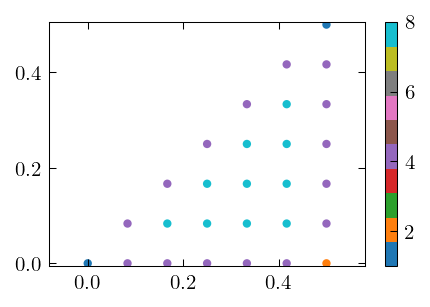

In [57]:
plt.scatter(D4.coords[:,0],D4.coords[:,1],c=  np.prod(D4.denominator)*D4.weights[:],cmap = 'tab10')
plt.axis('equal')
plt.colorbar()

### Irreducible D2 sampling

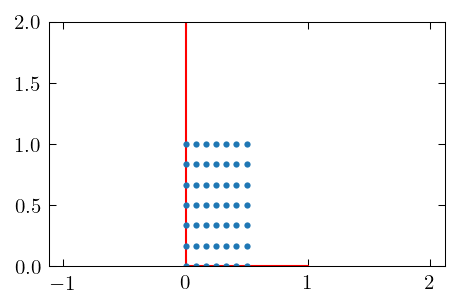

In [58]:
D2 =Unit_Cell_Sample.irreducible_sample(name = '2D_Rectangular_D2',basis_vectors = [[1,0],[0,2]], denominator = 12)
D2.plot()

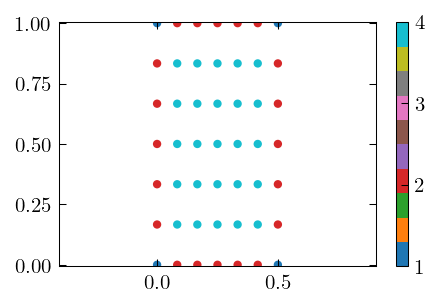

In [59]:
plt.scatter(D2.coords[:,0],D2.coords[:,1],c=  np.prod(D2.denominator)*D2.weights[:],cmap = 'tab10')
plt.axis('equal')
plt.colorbar()

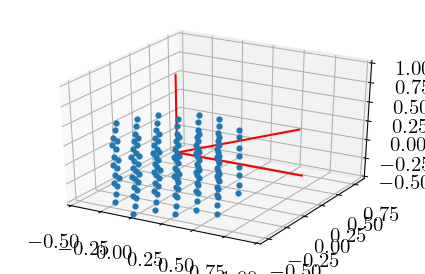

In [60]:
ws = Unit_Cell_Sample.wigner_seitz_cell(basis_vectors = [[1,0.5,0],
                                                         [0,np.sqrt(3)*0.5,0],
                                                         [0,0,1]], 
                                        denominator = (6,6,4))
ws.plot()

In [62]:
from pybandstructure.geometry.point_groups import *
basis_vectors = [[1,-0.5],
                 [0,0.5*np.sqrt(3)]]

denominator = 60
point_group = Point_Group.dihedral_group(n = 3,theta0 = np.arctan2(basis_vectors[1][0], basis_vectors[0][0]))

irr = Unit_Cell_Sample.irreducible_wigner_seitz_cell(basis_vectors = basis_vectors, 
                                  denominator = denominator, 
                                  point_group = point_group)
type(irr)

pybandstructure.sample.sample.Unit_Cell_Sample

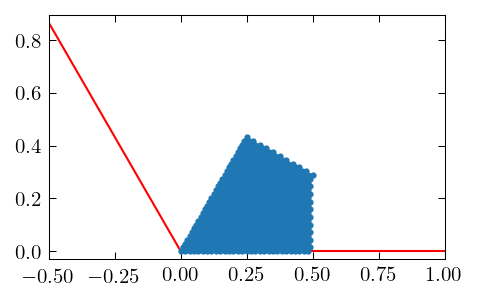

In [63]:
irr.plot()

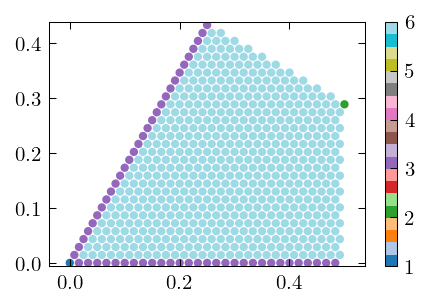

In [64]:
plt.scatter(irr.coords[:,0],irr.coords[:,1],c=  np.prod(irr.denominator)*irr.weights[:],cmap = 'tab20')
plt.axis('equal')
plt.colorbar(ticks = np.arange(1,13))